# Sieć Kohonena
## LAB1
## Piotr Fic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Implementacja

In [2]:
class KohonenNet:
    
    def __init__(self, M, N, n):
        self.M = M
        self.N = N
        self.n = n
        self.weights = np.random.uniform(0, 1, size = (self.M, self.N, self.n))
        
    def fit(self, X, n_iter, neig_fun, neig_param, etha):
        if neig_fun=="gauss":
            n_f = self.gauss
        elif neig_fun=="mexico":
            n_f = self.mexico
        else:
            assert("Neighbourhood fun: gauss or mexico")

        for i in range(1, n_iter+1):
            rows = np.random.permutation(len(X))
            for x in X[rows]:
                #searching for min distance with x
                min_dist = np.inf
                min_id = -1
                for r in range(self.N):
                    for c in range(self.M):
                        dist = np.linalg.norm(x-self.weights[r][c])
                        if dist<min_dist:
                            min_dist = dist
                            min_id = np.array([r, c])
                #updatng neighbourhood
                for r in range(self.N):
                    for c in range(self.M):
                        dist = np.linalg.norm(min_id-np.array([r, c]))
                        update = n_f(neig_param*dist, i)*etha*np.exp(-i)*(x-self.weights[r][c])
                        self.weights[r][c] = self.weights[r][c] + update
                
    #neighbourhood functions
    def gauss(self, d, i):
        return np.exp(-1*(d)**2)
    
    def mexico(self, d, t):
        return (2-4*d**2)*np.exp(-d**2)
    
    def find_classes(self, X, X_classes):
        k = max(X_classes)+1
        self.classes = np.zeros(shape=(self.M, self.N, k))
        for x, x_c in zip(X, X_classes):
            #searching for min distance with x
            min_dist = np.Inf
            min_r = None
            min_c = None
            for i in range(self.N):
                for j in range(self.M):
                    dist = np.linalg.norm(x-self.weights[i][j])
                    if dist<min_dist:
                        min_dist = dist
                        min_r = i
                        min_c = j
                            
            #adding class count for closest neuron
            self.classes[min_r][min_c][x_c] += 1
            
        out = [[None]*self.M for i in range(self.N)]
        for i in range(self.N):
            for j in range(self.M):
                out[i][j] = np.argmax(self.classes[i][j])
        return out

In [3]:
def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))
def standardize(x):
    return (x - np.mean(x)) / np.std(x)

## Testy działania
### df: "hexagon"

In [4]:
hexagon = pd.read_csv('./mio2/hexagon.csv')
X = hexagon.iloc[:, 0:2]
X = normalize(np.array(X))

### Wizualizacja procesu uczenia
W każdej epoce uczenia neurony sieci oznaczone czerwonymi punktami nanoszę na chmurę punktów ze zbioru "hexagon".  
*Architektura*: siatka 5x5  
*Parametry*:
- etha: 1
- szerokość sąsiedztwa: 0.9
- funkcja sąsiedztwa: gaussowska

Epoka: 1


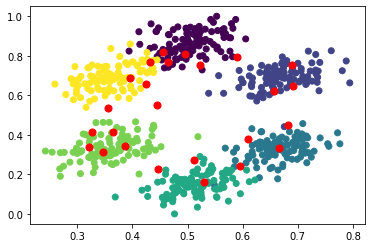

Epoka: 2


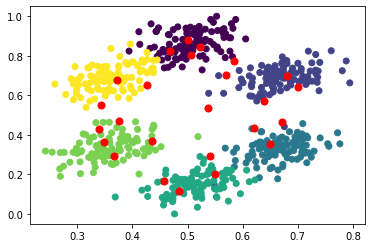

Epoka: 3


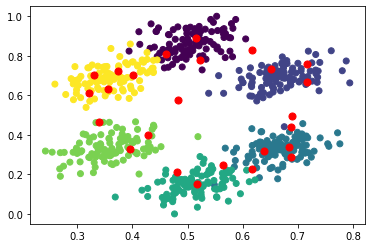

Epoka: 4


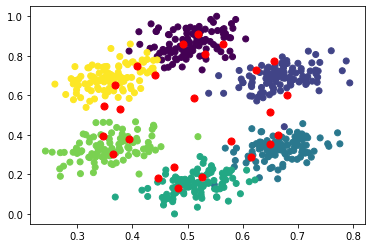

Epoka: 5


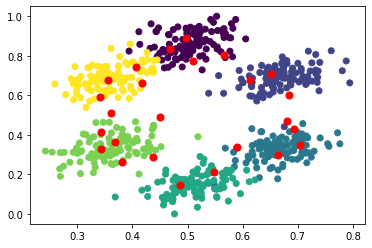

Epoka: 6


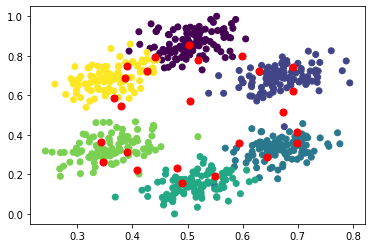

Epoka: 7


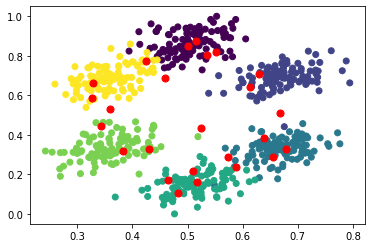

Epoka: 8


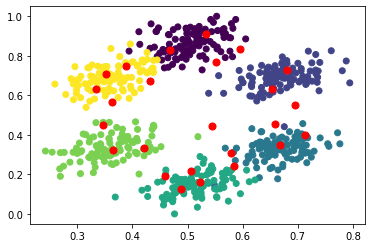

Epoka: 9


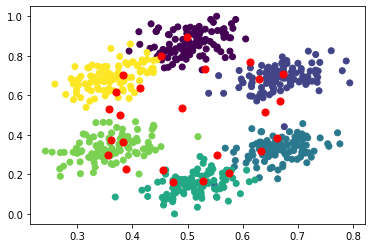

Epoka: 10


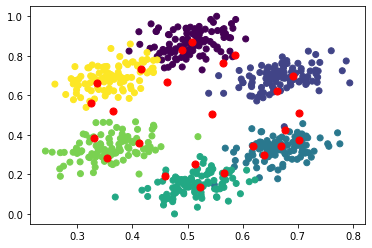

In [195]:
kn = KohonenNet(5, 5, 2)
for i in range(10):
    print("Epoka: " + str(i+1))
    kn.fit(X, 1, "gauss", neig_param=0.9, etha=1)
    plt.scatter(X.T[0], X.T[1], c=hexagon.c)
    plt.scatter(kn.weights.reshape(-2, 2).T[0], kn.weights.reshape(-2, 2).T[1], s=50, c="red")
    plt.show()

### Wizualizacja odwzorowania klas

In [196]:
klasy = np.array(kn.find_classes(X, hexagon.c))

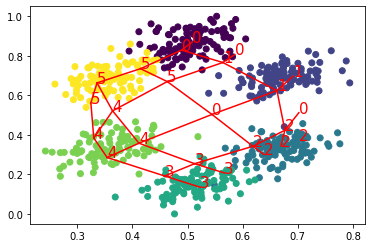

In [197]:
fig, ax = plt.subplots()
ax.scatter(X.T[0], X.T[1], c=hexagon.c)
for i in range(kn.N):
    for j in range(kn.M):
        ax.annotate(klasy[i][j], (kn.weights[i][j][0], kn.weights[i][j][1]), c="red", size=15)
        if j<kn.M-1 and i<kn.N-1:
            ax.plot(kn.weights[i:i+2].T[0][j], kn.weights[i:i+2].T[1][j], c="red")
            ax.plot(kn.weights[i][j:j+2].T[0], kn.weights[i][j:j+2].T[1], c="red")
plt.show()

### Test dla innych parametrów

In [203]:
neig_fun = ["gauss", "mexico"]
neig_param = [0.1, 0.3, 0.5, 0.8, 0.9]

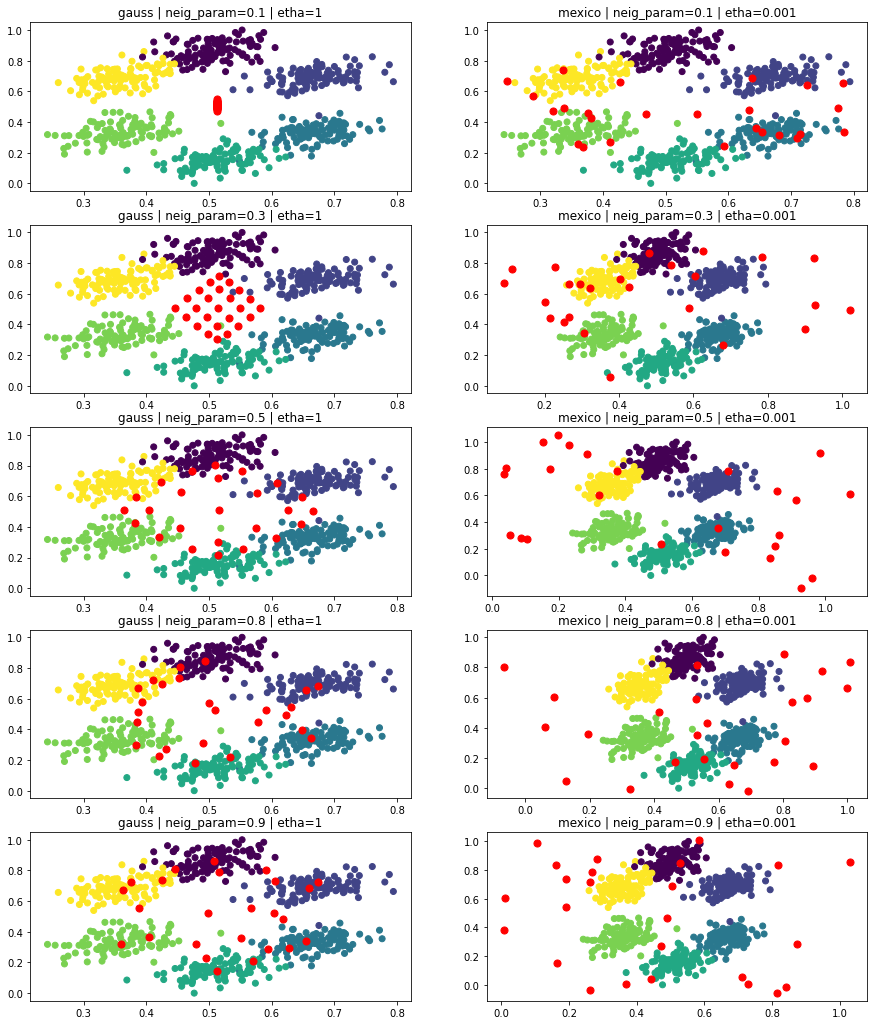

In [212]:
fig, axs = plt.subplots(5, 2, figsize=(15, 18))
for i in range(len(neig_param)):
    for j in range(len(neig_fun)):
        kn = KohonenNet(5, 5, 2)
        if j==0:
            e=1
        else:
            e=0.001
        kn.fit(X, 10, neig_fun[j], neig_param[i], etha=e)
        axs[i, j].scatter(X.T[0], X.T[1], c=hexagon.c)
        axs[i, j].scatter(kn.weights.reshape(-2, 2).T[0], kn.weights.reshape(-2, 2).T[1], s=50, c="red")
        axs[i, j].set_title(neig_fun[j] + " | neig_param=" + str(neig_param[i]) + " | etha=" + str(e))

### df: cube

In [20]:
cube = pd.read_csv('./mio2/cube.csv')
X = cube.iloc[:, 0:3]
X = normalize(np.array(X))

In [66]:
kn = KohonenNet(5, 5, 3)
kn.fit(X, 20, "gauss", neig_param=0.9, etha=1)

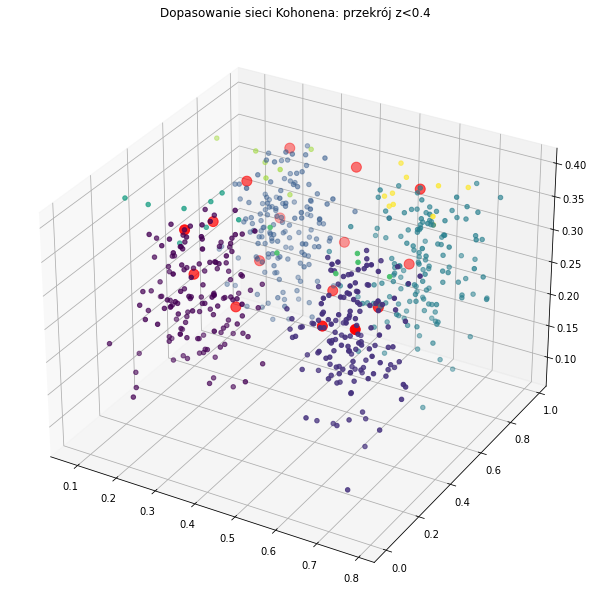

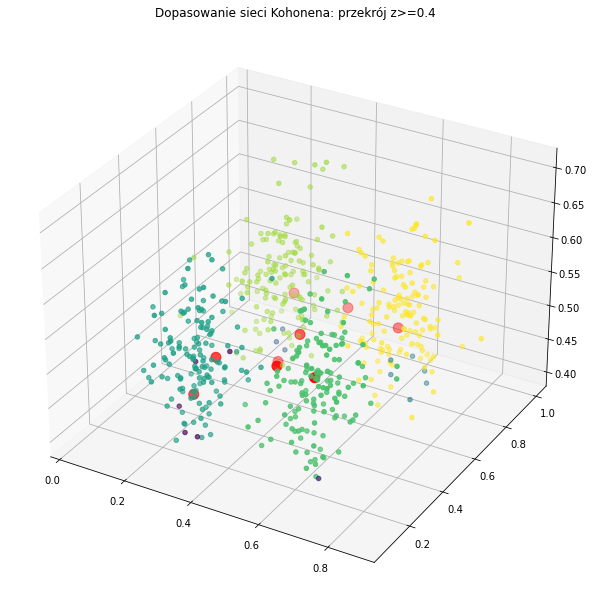

In [73]:
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
ax.scatter(X.T[0][X.T[2]<0.4], X.T[1][X.T[2]<0.4], X.T[2][X.T[2]<0.4], c=cube.c[X.T[2]<0.4])
ax.scatter(kn.weights.reshape(-2, 3).T[0][kn.weights.reshape(-2, 3).T[2]<0.4], 
           kn.weights.reshape(-2, 3).T[1][kn.weights.reshape(-2, 3).T[2]<0.4], 
           kn.weights.reshape(-2, 3).T[2][kn.weights.reshape(-2, 3).T[2]<0.4], 
           s=100, c="red")
plt.title("Dopasowanie sieci Kohonena: przekrój z<0.4")
plt.show()

fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
ax.scatter(X.T[0][X.T[2]>=0.4], X.T[1][X.T[2]>=0.4], X.T[2][X.T[2]>=0.4], c=cube.c[X.T[2]>=0.4])
ax.scatter(kn.weights.reshape(-2, 3).T[0][kn.weights.reshape(-2, 3).T[2]>=0.4], 
           kn.weights.reshape(-2, 3).T[1][kn.weights.reshape(-2, 3).T[2]>=0.4], 
           kn.weights.reshape(-2, 3).T[2][kn.weights.reshape(-2, 3).T[2]>=0.4], 
           s=100, c="red")
plt.title("Dopasowanie sieci Kohonena: przekrój z>=0.4")
plt.show()

In [74]:
kn.find_classes(X, cube.c)

[[0, 0, 0, 1, 1],
 [4, 0, 0, 3, 1],
 [4, 6, 2, 2, 3],
 [5, 6, 6, 2, 3],
 [5, 7, 6, 7, 7]]

## Wnioski
Sieć samoorganizująca Kohonena efektywnie i dobrze odwzorowała rzeczywiste klastry danych w procesie uczenia nienadzorowanego, zarówno dla danych 2D jak i 3D.